# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [7]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

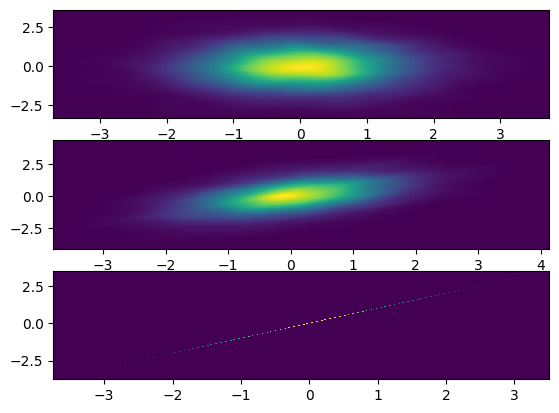

In [8]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [10]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

In [4]:
from sklearn.metrics import mutual_info_score
rho_values = np.linspace(0, 1, 11)
n_samples = 1000
# Function to discretize the data into bins
def discretize(data, bins):
    return np.digitize(data, np.histogram(data, bins=bins)[1][:-1])

pearson_correlations = []
mutual_informations = []

for rho in rho_values:
    # Mean and covariance matrix for the multivariate normal distribution
    mean = [0, 0]
    covariance = [[1, rho], [rho, 1]]
    
    # Generating the samples
    samples = np.random.multivariate_normal(mean, covariance, n_samples)
    X, Y = samples[:, 0], samples[:, 1]
    
    # Computing the Pearson correlation
    pearson_corr, _ = pearsonr(X, Y)
    pearson_correlations.append(pearson_corr)
    
    # Discretizing the variables into 10 bins each
    X_discrete = discretize(X, bins=10)
    Y_discrete = discretize(Y, bins=10)
    
    # Computing the mutual information
    mutual_info = mutual_info_score(X_discrete, Y_discrete)
    mutual_informations.append(mutual_info)

# Results
# Creating a structured array for better readability
results = np.rec.array([(rho, pearson_corr, mutual_info) for rho, pearson_corr, mutual_info in zip(rho_values, pearson_correlations, mutual_informations)],
                       dtype=[('Rho', 'f4'), ('Pearson Correlation', 'f4'), ('Mutual Information', 'f4')])

results_readable = "\n".join([f"Rho: {row[0]:.2f}, Pearson Correlation: {row[1]:.4f}, Mutual Information: {row[2]:.4f}" for row in results])

print(results_readable)


Rho: 0.00, Pearson Correlation: 0.0454, Mutual Information: 0.0348
Rho: 0.10, Pearson Correlation: 0.1149, Mutual Information: 0.0398
Rho: 0.20, Pearson Correlation: 0.2059, Mutual Information: 0.0606
Rho: 0.30, Pearson Correlation: 0.3353, Mutual Information: 0.0899
Rho: 0.40, Pearson Correlation: 0.4183, Mutual Information: 0.1110
Rho: 0.50, Pearson Correlation: 0.4918, Mutual Information: 0.1618
Rho: 0.60, Pearson Correlation: 0.5325, Mutual Information: 0.1911
Rho: 0.70, Pearson Correlation: 0.7009, Mutual Information: 0.3432
Rho: 0.80, Pearson Correlation: 0.8085, Mutual Information: 0.4869
Rho: 0.90, Pearson Correlation: 0.8975, Mutual Information: 0.7450
Rho: 1.00, Pearson Correlation: 1.0000, Mutual Information: 1.8631


#### bp 3)

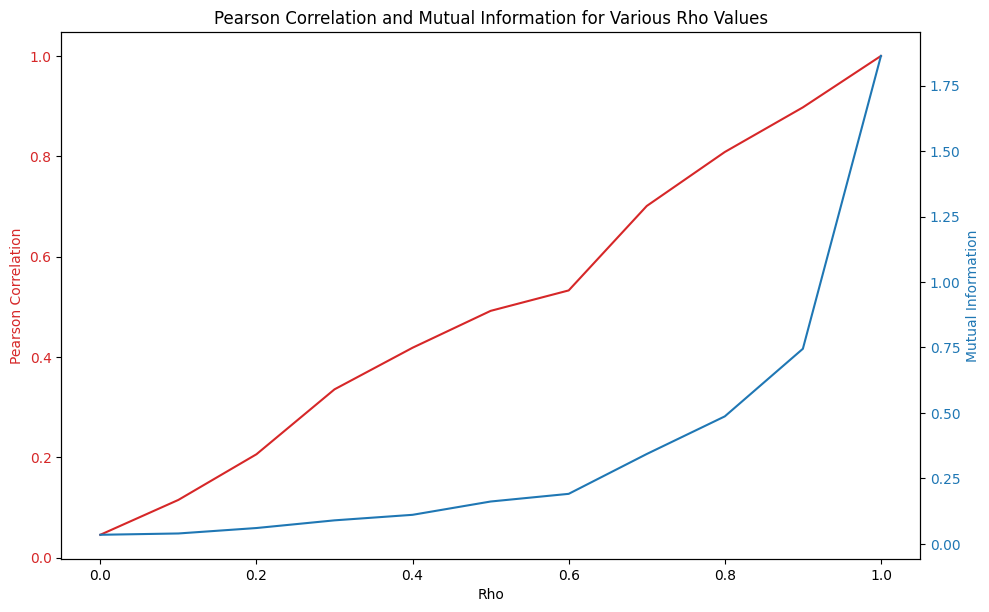

In [5]:
# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Rho')
ax1.set_ylabel('Pearson Correlation', color=color)
ax1.plot(rho_values, pearson_correlations, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mutual Information', color=color)  # we already handled the x-label with ax1
ax2.plot(rho_values, mutual_informations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Pearson Correlation and Mutual Information for Various Rho Values')
plt.show()


#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

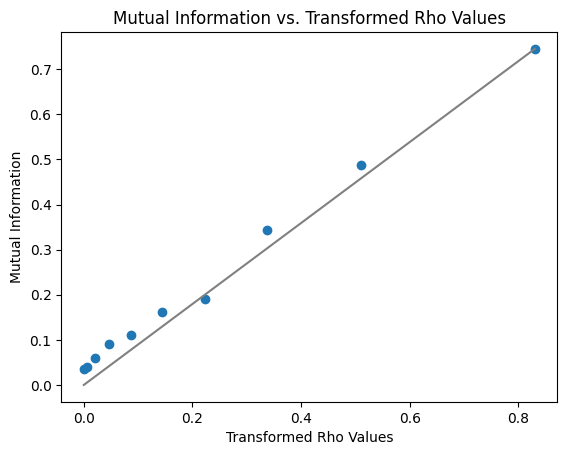

In [30]:
plt.plot(-np.log(1 - rho_values[:10]**2)/2, mutual_informations[:10], "o", color='C0')
plt.plot([0, max(-np.log(1 - rho_values[:10]**2)/2)], [0, max(mutual_informations[:10])], color="gray")
plt.xlabel('Transformed Rho Values')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs. Transformed Rho Values')
plt.show()


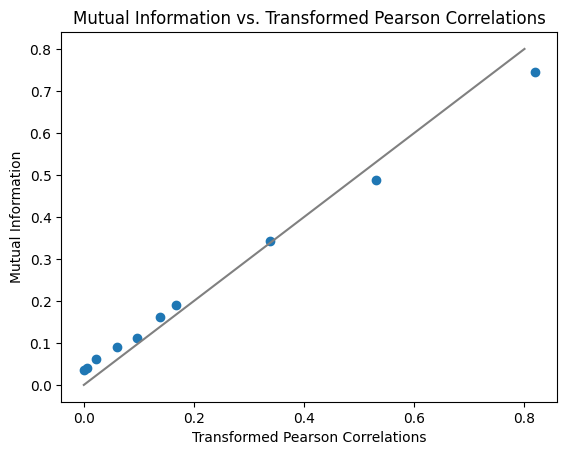

In [32]:
plt.plot(-np.log(1 - np.array(pearson_correlations[:10])**2)/2, mutual_informations[:10], "o")
plt.plot([0,0.8], [0, 0.8], color="gray")
plt.xlabel('Transformed Pearson Correlations')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs. Transformed Pearson Correlations')
plt.show()


### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

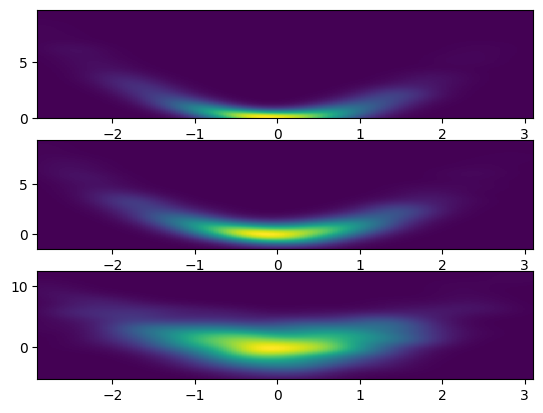

In [9]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [11]:
eps_seq = np.exp(np.linspace(0, 1, 10))
n = 1000
N = 100
rho_seq = np.linspace(0, 1, 10)
cor_pearson_results = np.zeros((N, np.shape(eps_seq)[0]))
mi_results = np.zeros((N, np.shape(eps_seq)[0]))

for i in range(np.shape(rho_seq)[0]):
    eps = eps_seq[i]
    for j in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, eps, n)

        cor_pearson_results[j, i] = pearsonr(x, y)[0]

        x_bins = np.linspace(x.min(), x.max(), 10)
        y_bins = np.linspace(y.min(), y.max(), 10)

        x_discrete = np.digitize(data_2d[:,0], bins=x_bins)
        y_discrete = np.digitize(data_2d[:,1], bins=y_bins)

        mi_results[j, i] = mutual_info_score(x_discrete, y_discrete)

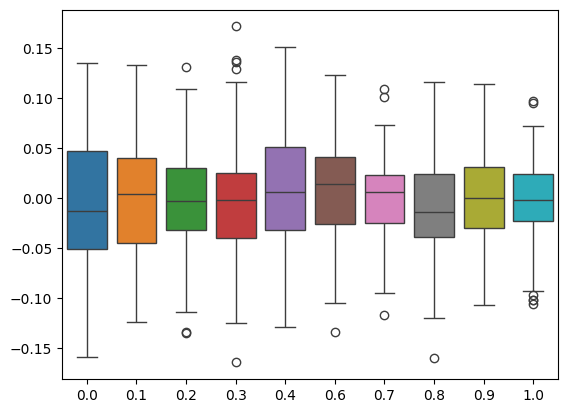

In [12]:
sns.boxplot(cor_pearson_results)
plt.xticks(np.arange(0,10,1), np.round(rho_seq, 1))
plt.show()

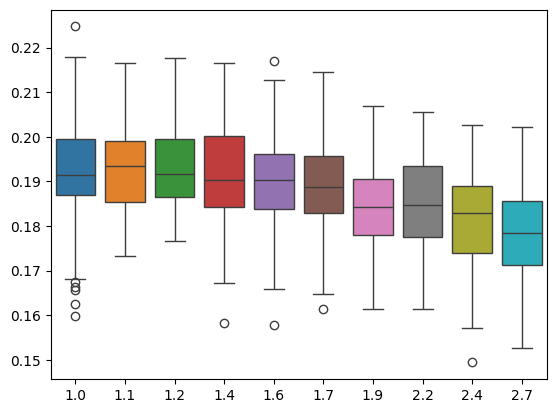

In [13]:
sns.boxplot(mi_results)
plt.xticks(np.arange(0,10,1), np.round(eps_seq, 1))
plt.show()

## Task 2

### a)

In [14]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [15]:
def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [23]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
# Generating an independent sample (rho = 0) which indicates independence
rho_independent = 0  # Zero rho indicates independence
covariance_independent = [[1, rho_independent], [rho_independent, 1]]
X_independent, Y_independent = np.random.multivariate_normal(mean, covariance_independent, n_samples).T

# Discretizing the continuous variables into 10 bins each for the tests
X_independent_discrete = discretize(X_independent, bins=10)
Y_independent_discrete = discretize(Y_independent, bins=10)

# Output the first few elements of each to confirm
X_independent[:5], Y_independent[:5], X_independent_discrete[:5], Y_independent_discrete[:5]


(array([-1.09243579, -0.97042808,  0.75794182, -0.33951072,  0.78672726]),
 array([-0.82445506,  0.46635928, -0.6317144 , -1.70185746,  0.89246084]),
 array([3, 3, 6, 5, 6], dtype=int64),
 array([4, 6, 5, 3, 7], dtype=int64))

In [25]:
B = 100
print('MI test:', indep_test_asymptotic(X_independent_discrete, Y_independent_discrete, 'mi'))
print('Pearson’s chi-squared test:', indep_test_asymptotic(X_independent_discrete, Y_independent_discrete, 'chi2'))
print('Permutation test:', indep_test_permutation(X_independent_discrete, Y_independent_discrete, B))

MI test: (69.74330587411147, 0.8094896515635042)
Pearson’s chi-squared test: (62.714742877547174, 0.93424814537067)
Permutation test: (69.74330587411147, 0.7326732673267327)


**p-value is close to 1, therefore there is no reason to reject null hypothesis**

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [26]:
# independent r.v. - ideally we will reject the null hypothesis
n = 5000
B = 100
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
X = data[:, 0]
Y = data[:, 1]

X_dependent_discrete = discretize(X, bins=10)
Y_dependent_discrete = discretize(Y, bins=10)

In [27]:
print('MI test:', indep_test_asymptotic(X_dependent_discrete, Y_dependent_discrete, 'mi'))
print('Pearson’s chi-squared test:', indep_test_asymptotic(X_dependent_discrete, Y_dependent_discrete, 'chi2'))
print('Permutation test:', indep_test_permutation(X_dependent_discrete, Y_dependent_discrete, B))

MI test: (1418.824188724143, 0.0)
Pearson’s chi-squared test: (1698.8864321165076, 0.0)
Permutation test: (1418.824188724143, 0.009900990099009901)


**p-value is less than 0.05, so we reject the null hypothesis**